In [1]:
import pickle
import torch
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import natsort
import multiprocessing
import seaborn as sns
import pydicom
from process_dcm_2_png import *

In [41]:
patients = ['C0004065_1_','C0004214_1_','C0004236_1_','C0004238_1_']
basepath = 'test_85_256/hr_256/'

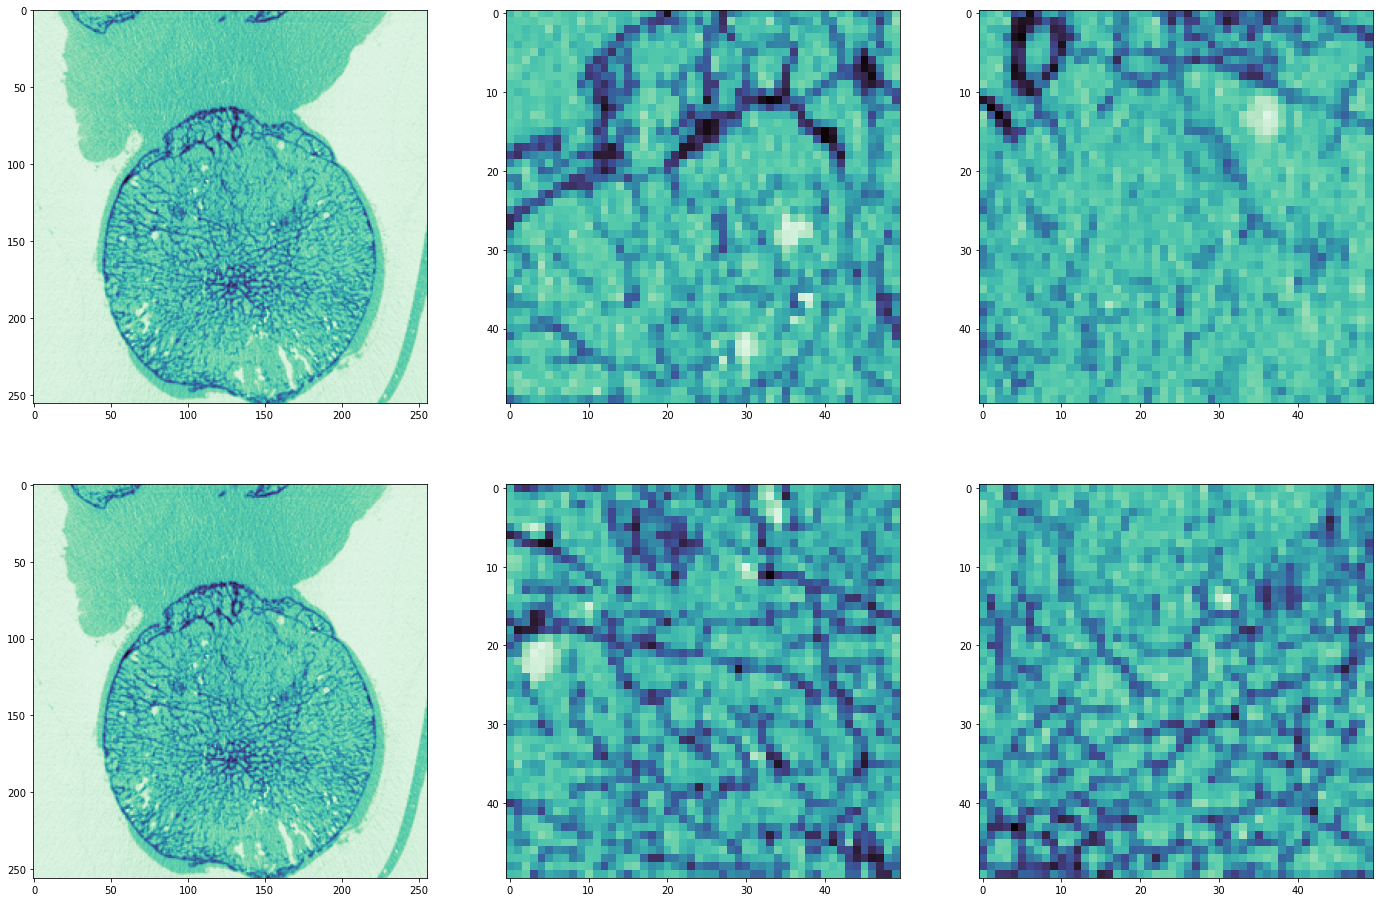

In [159]:
impath = basepath+patients[1]+'00600.png'
img = np.array(Image.open(impath))[:,:,0]

fig,ax = plt.subplots(2,3,figsize=(24,16))
ax[0,0].imshow(img[:,:], cmap='mako_r')
ax[1,0].imshow(img[:,:], cmap='mako_r')

ax[0,1].imshow(img[75:125,75:125], cmap='mako_r')
ax[0,2].imshow(img[75:125,125:175], cmap='mako_r')
ax[1,1].imshow(img[125:175,75:125], cmap='mako_r')
ax[1,2].imshow(img[125:175,125:175], cmap='mako_r')


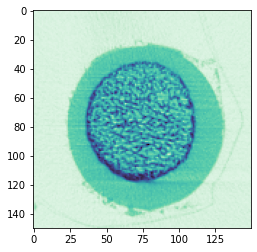

In [153]:
plt.imshow(img[50:200,50:200], cmap='mako_r')

In [168]:
dcmspath = '../../../../../../../../d4/past_studies/exvivo/Femur_Cadaver_Studies/2022_02_FullDataset/*/*/'

In [176]:
len(glob.glob(dcmspath+'C0004065_1_*.DCM'))

7000

In [173]:
len(glob.glob(dcmspath+'C0004238_1_*.DCM'))

3500

../../../../../../../../d4/past_studies/exvivo/Femur_Cadaver_Studies/2022_02_FullDataset/2020/ND17348_new/C0004065_1_01014.DCM


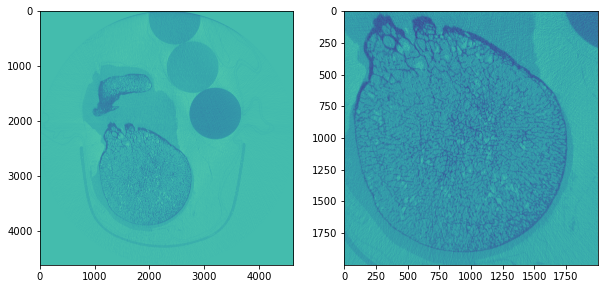

In [26]:
basepath = '../../../../../../../../d4/past_studies/exvivo/Femur_Cadaver_Studies/2022_02_FullDataset/*/*/'
patients = ['C0004065*.DCM','C0004214*.DCM','C0004236*.DCM','C0004238*.DCM']
impaths = sorted(glob.glob(basepath+patients[0]))
ds = pydicom.read_file(impaths[1014]) # read dicom image
print(impaths[1014])
img = ds.pixel_array

fig,ax = plt.subplots(1,2,figsize=(10,20))
ax[0].imshow(img, cmap='mako_r')
ax[1].imshow(img[2000:4000,1000:3000], cmap='mako_r')
# ax[1].imshow(img[1000:3000,1000:3000], cmap='mako_r')

In [47]:
basepath = '../../../../../../../../d4/past_studies/exvivo/Femur_Cadaver_Studies/2022_02_FullDataset/*/*/'
patients = ['C0004065','C0004214','C0004236','C0004238']

# crop_array = [((3000,1900),(2500,1500),(2000,1700)),
#               ((3250,2600),(2100,2500),(2000,2400)),
#               ((3200,2200),(2250,2100),(2000,2000)),
#               ((3400,2250),(2400,2400),(2250,2250))]

crop_array = [((1900,3000),(1500,2500),(1700,2000)),
              ((2600,3250),(2500,2100),(2400,2000)),
              ((2200,3200),(2100,2250),(2000,2000)),
              ((2250,3400),(2400,2400),(2250,2250))]

processing_list = []
for i,patient in enumerate(patients):
    impaths = sorted(glob.glob(basepath+patient+'*.DCM'))
    for j,path in enumerate(impaths):
        if j < 1100: crop_center = crop_array[i][0]
        elif j < 1600: crop_center = crop_array[i][1]
        else: crop_center = crop_array[i][2]
            
        savepath = 'manual_cropped_pngs/'+os.path.splitext(os.path.split(path)[1])[0]+'.png'
        processing_list.append((path,crop_center,savepath))

In [155]:
basepath = '../../../../../../../../d4/past_studies/exvivo/Femur_Cadaver_Studies/2022_02_FullDataset/*/*/'
patients = ['C0004065','C0004214','C0004236','C0004238']

# crop_array = [((3000,1900),(2500,1500),(2000,1700)),
#               ((3250,2600),(2100,2500),(2000,2400)),
#               ((3200,2200),(2250,2100),(2000,2000)),
#               ((3400,2250),(2400,2400),(2250,2250))]

crop_array = [((1900,3000),(1500,2500),(1700,2000)),
              ((2600,3250),(2500,2100),(2400,2000)),
              ((2200,3200),(2100,2250),(2000,2000)),
              ((2250,3400),(2400,2400),(2250,2250))]

processing_list = []
for i,patient in enumerate(patients):
    impaths = sorted(glob.glob(basepath+patient+'*.DCM'))
    for j,path in enumerate(impaths):
        if j < 900: continue
        elif j > 1099: break
#         if j < 1100: crop_center = crop_array[i][0]
#         elif j < 1600: crop_center = crop_array[i][1]
#         else: crop_center = crop_array[i][2]
        crop_center = crop_array[i][0]
        savepath = 'manual_cropped_pngs/'+os.path.splitext(os.path.split(path)[1])[0]+'.png'
        processing_list.append((path,crop_center,savepath))
    break

In [156]:
with mp.Pool(mp.cpu_count()) as pool:
    pool.starmap(save_to_tiff, processing_list)

In [128]:
import random
from IPython import display
import pylab as pl
imglist = glob.glob('test_85_256/hr_256/*.png')

test_85_256/hr_256/C0004065_1_00782.png


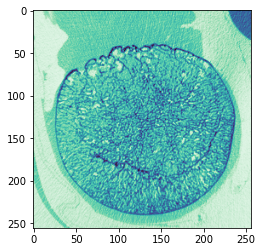

In [77]:
cond=False
while cond==False:
    i = int(random.random()*len(imglist))
    if 'C0004065' in imglist[i]: cond=True
plt.imshow(np.array(Image.open(imglist[i])),cmap='mako_r')
print(imglist[i])

In [131]:

imglist = sorted(glob.glob('test_85_256/hr_256/*.png'))[:3500]
i = 0

KeyboardInterrupt: 

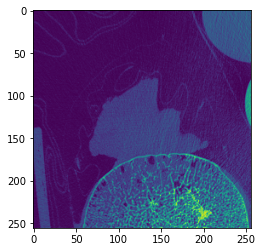

In [136]:
for im in imglist[::4]:
    img = plt.imread(im)
    pl.imshow(img)
#     print(im)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.1)

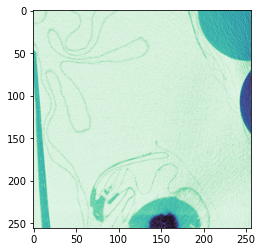

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [125]:
plot = None
for im in imglist:
    img = plt.imread(im)
    if plot is None:
        plot = plt.imshow(np.array(Image.open(im)),cmap='mako_r')
    else:
        plot.set_data(img)
    plt.pause(1)
    plt.draw()